<a href="https://colab.research.google.com/github/TheodorosChristou/COM616_AE2_TheodorosChristou/blob/main/VGG_Architecture_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_50 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 64)      

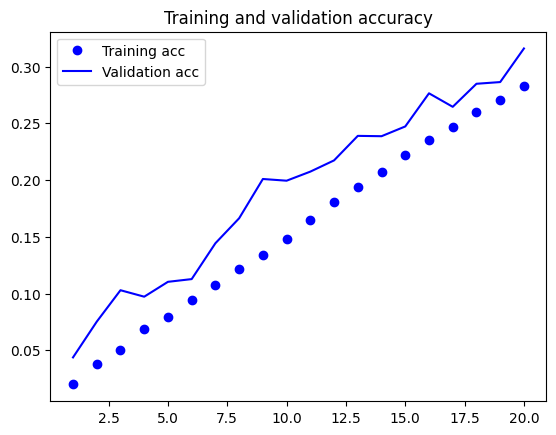

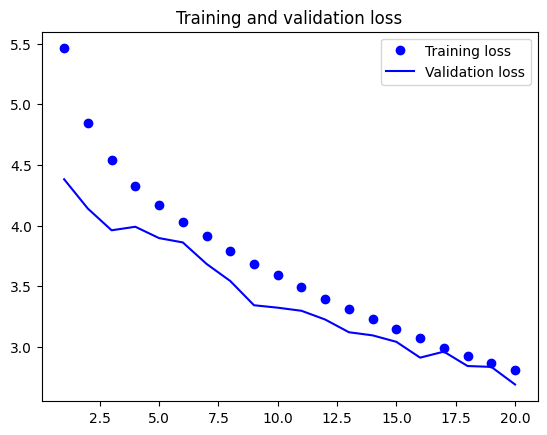

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.63107   0.65000   0.64039       100
          dolphin    0.40517   0.47000   0.43519       100
            otter    0.23256   0.20000   0.21505       100
             seal    0.13613   0.26000   0.17869       100
            whale    0.13393   0.15000   0.14151       100
         aquarium    0.27273   0.27000   0.27136       100
             fish    0.29323   0.39000   0.33476       100
              ray    0.34000   0.34000   0.34000       100
            shark    0.31667   0.38000   0.34545       100
            trout    0.60811   0.45000   0.51724       100
          orchids    0.43750   0.14000   0.21212       100
          poppies    0.26087   0.06000   0.09756       100
            roses    0.36986   0.27000   0.31214       100
       sunflowers    0.35556   0.16000   0.22069       100
           tulips    0.20635   0.13000   0.15951     

In [ ]:
def VGG():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG = VGG()

optimizer = Adam(learning_rate=0.0001)
VGG.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

VGG.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG)
        scores = VGG.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {VGG.metrics_names[1]} of {scores[1]*100}')
        return VGG

VGG = gpu()

# Evaluate the model
test_loss, test_acc = VGG.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
